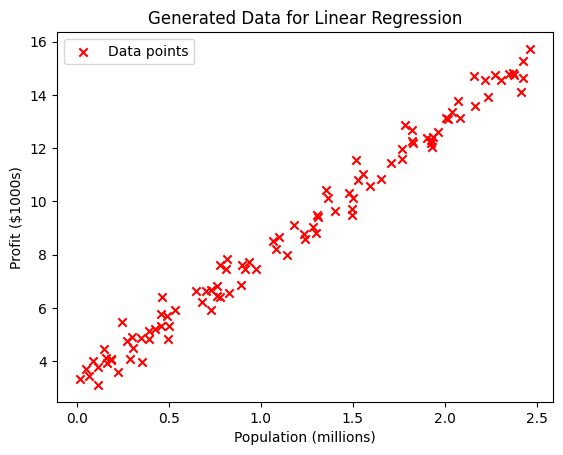

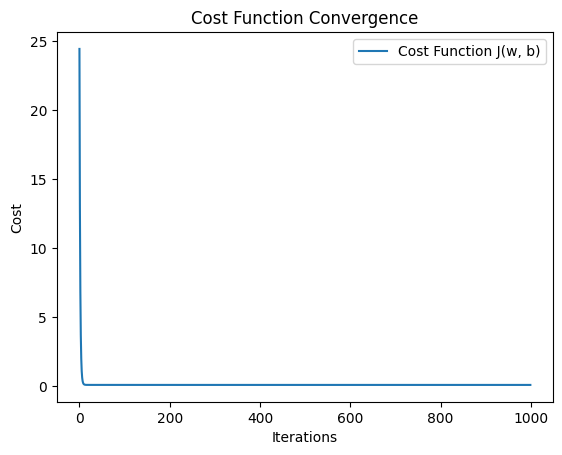

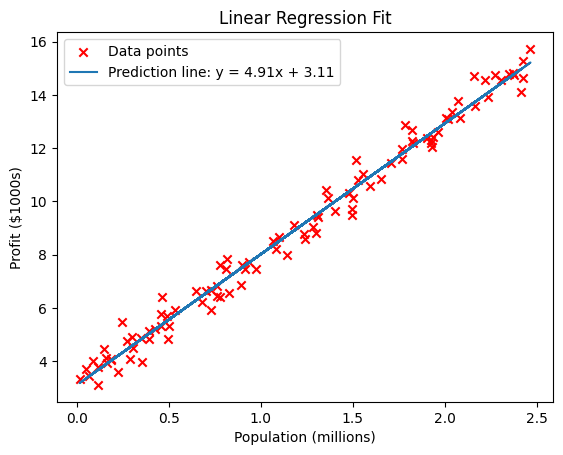

Final parameters: w = 4.9080, b = 3.1075


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression
np.random.seed(42)  # For reproducibility
m = 100  # Number of data points

# Generate random x values (population in millions)
x_train = 2.5 * np.random.rand(m, 1)  # Population in range [0, 2.5] million

# Generate corresponding y values (profit in $1000s) with some noise
true_w = 5  # Assume each additional unit of population contributes $5K to profit
true_b = 3  # Base profit of $3K in a city with zero population
y_train = true_w * x_train + true_b + np.random.randn(m, 1) * 0.5  # Add noise

# Plot the generated dataset
plt.scatter(x_train, y_train, marker='x', c='r', label='Data points')
plt.xlabel("Population (millions)")
plt.ylabel("Profit ($1000s)")
plt.title("Generated Data for Linear Regression")
plt.legend()
plt.show()

# Compute cost function
def compute_cost(x, y, w, b):
    """Compute cost for linear regression"""
    m = len(y)
    predictions = w * x + b  # Hypothesis function h(x) = w * x + b
    errors = predictions - y  # Compute errors
    cost = (1 / (2 * m)) * np.sum(errors ** 2)  # Compute cost function
    return cost

# Compute gradients
def compute_gradient(x, y, w, b):
    """Compute gradient for linear regression"""
    m = len(y)
    dj_dw = (1 / m) * np.sum((w * x + b - y) * x)  # Partial derivative w.r.t w
    dj_db = (1 / m) * np.sum(w * x + b - y)  # Partial derivative w.r.t b
    return dj_dw, dj_db

# Implement gradient descent
def gradient_descent(x, y, w, b, alpha, num_iters):
    """Perform gradient descent to learn w and b"""
    m = len(y)
    J_history = []  # Store cost values

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)  # Compute gradients
        w -= alpha * dj_dw  # Update w
        b -= alpha * dj_db  # Update b

        cost = compute_cost(x, y, w, b)  # Compute cost
        J_history.append(cost)  # Store cost

    return w, b, J_history

# Initialize parameters
initial_w = 0
initial_b = 0
alpha = 0.1  # Learning rate
num_iters = 1000  # Number of iterations

# Run gradient descent
w_final, b_final, J_history = gradient_descent(x_train, y_train, initial_w, initial_b, alpha, num_iters)

# Plot cost function history
plt.plot(range(len(J_history)), J_history, label="Cost Function J(w, b)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.legend()
plt.show()

# Plot final regression line
plt.scatter(x_train, y_train, marker='x', c='r', label='Data points')
plt.plot(x_train, w_final * x_train + b_final, label=f'Prediction line: y = {w_final:.2f}x + {b_final:.2f}')
plt.xlabel("Population (millions)")
plt.ylabel("Profit ($1000s)")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

# Display final parameter values
print(f"Final parameters: w = {w_final:.4f}, b = {b_final:.4f}")
